In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

In [3]:
data=pd.read_csv('bitcoin_dataset.csv')

In [4]:
data

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.00000,2043200.0,0.000000e+00,0.000000e+00,0.0000,0.000235,0,1.000000,0.000,...,31.781022,0.000000,241,244,41240,244,244,65173.130,36500.0000,0.000000e+00
1,2/18/2010,0.00000,2054650.0,0.000000e+00,0.000000e+00,0.0000,0.000241,0,1.000000,0.000,...,154.463801,0.000000,234,235,41475,235,235,18911.740,7413.0000,0.000000e+00
2,2/19/2010,0.00000,2063600.0,0.000000e+00,0.000000e+00,0.0000,0.000228,0,1.000000,0.000,...,1278.516635,0.000000,185,183,41658,183,183,9749.980,700.0000,0.000000e+00
3,2/20/2010,0.00000,2074700.0,0.000000e+00,0.000000e+00,0.0000,0.000218,0,1.000000,0.000,...,22186.687990,0.000000,224,224,41882,224,224,11150.030,50.0000,0.000000e+00
4,2/21/2010,0.00000,2085400.0,0.000000e+00,0.000000e+00,0.0000,0.000234,0,1.000000,0.000,...,689.179876,0.000000,218,218,42100,218,218,12266.830,1553.0000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,1/27/2018,11524.77667,16830312.5,1.940000e+11,7.630946e+08,153844.0759,1.038548,0,1232.980892,11.600,...,1.778601,126.855696,541699,193578,295802277,188058,126082,1363301.068,119799.4611,1.380662e+09
2902,1/28/2018,11765.71000,16832287.5,1.980000e+11,7.381042e+08,154006.9753,1.031009,0,1350.924051,11.950,...,1.302242,117.430262,492738,213446,296015723,205967,137919,3128906.096,163590.5694,1.924759e+09
2903,1/29/2018,11212.65500,16834137.5,1.890000e+11,6.111197e+08,154157.6651,1.018174,0,1568.756757,12.275,...,1.243012,96.382352,532630,232176,296247899,225983,155772,1941048.853,160557.7065,1.800278e+09
2904,1/30/2018,10184.06167,16836225.0,1.710000e+11,1.266284e+09,154322.5790,0.987509,0,1416.820359,11.075,...,1.301143,96.749249,531440,236609,296484508,230310,158259,2359671.266,172755.8071,1.759356e+09


In [5]:
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344352e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866841e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [92]:
data.iloc[1023]

Date                                                     12/6/2012
btc_market_price                                           13.6888
btc_total_bitcoins                                     1.05288e+07
btc_market_cap                                         1.44126e+08
btc_trade_volume                                            718984
btc_blocks_size                                               3829
btc_avg_block_size                                        0.127314
btc_n_orphaned_blocks                                            0
btc_n_transactions_per_block                                   250
btc_median_confirmation_time                                  11.6
btc_hash_rate                                              24.4457
btc_difficulty                                         3.43891e+06
btc_miners_revenue                                         49361.8
btc_transaction_fees                                       31.0582
btc_cost_per_transaction_percent                           1.6

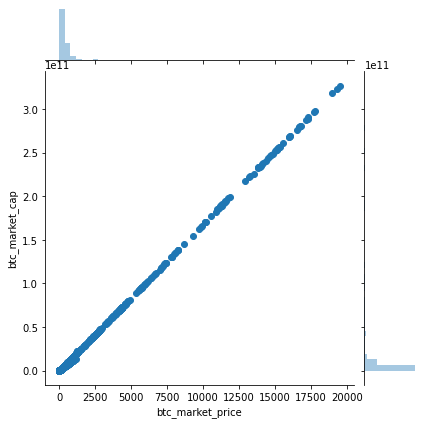

In [91]:
import seaborn as sns
p = sns.jointplot(data=data,x='btc_market_price', y='btc_market_cap')

In [65]:
data2=data[['btc_market_cap', 'btc_n_transactions','btc_miners_revenue','btc_cost_per_transaction','btc_difficulty',
            'btc_hash_rate','btc_cost_per_transaction_percent','btc_market_price']]

In [66]:
data2

,btc_market_cap,btc_n_transactions,btc_miners_revenue,btc_cost_per_transaction,btc_difficulty,btc_hash_rate,btc_cost_per_transaction_percent,btc_market_price
0,0.000000e+00,244,0.00,0.000000,2.527738e+00,2.920000e-05,31.781022,0.00000
1,0.000000e+00,235,0.00,0.000000,2.527738e+00,2.880000e-05,154.463801,0.00000
2,0.000000e+00,183,0.00,0.000000,2.527738e+00,2.250000e-05,1278.516635,0.00000
3,0.000000e+00,224,0.00,0.000000,2.527738e+00,2.790000e-05,22186.687990,0.00000
4,0.000000e+00,218,0.00,0.000000,2.527738e+00,2.690000e-05,689.179876,0.00000
...,...,...,...,...,...,...,...,...
2901,1.940000e+11,193578,23654604.11,126.855696,2.600000e+12,2.031575e+07,1.778601,11524.77667
2902,1.980000e+11,213446,24143236.92,117.430262,2.600000e+12,2.044515e+07,1.302242,11765.71000
2903,1.890000e+11,232176,21651636.81,96.382352,2.600000e+12,1.915115e+07,1.243012,11212.65500
2904,1.710000e+11,236609,22124873.97,96.749249,2.600000e+12,2.160975e+07,1.301143,10184.06167


In [67]:
data2.isnull().sum()

btc_market_cap                       0
btc_n_transactions                   0
btc_miners_revenue                   0
btc_cost_per_transaction             0
btc_difficulty                      16
btc_hash_rate                        0
btc_cost_per_transaction_percent     0
btc_market_price                     0
dtype: int64

In [69]:
mean=data2.btc_difficulty.mean()
data2.btc_difficulty.fillna(mean, inplace=True)

C:\Users\pavan\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [70]:
data2.isnull().sum()

btc_market_cap                      0
btc_n_transactions                  0
btc_miners_revenue                  0
btc_cost_per_transaction            0
btc_difficulty                      0
btc_hash_rate                       0
btc_cost_per_transaction_percent    0
btc_market_price                    0
dtype: int64

In [80]:
X=data2.drop(['btc_market_price'],axis='columns',inplace=False)
y=data2['btc_market_price']

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape, y_train.shape,y_test.shape)

(2324, 7) (582, 7) (2324,) (582,)


In [83]:
l_reg=LinearRegression()
l_reg.fit(X_train,y_train)
print("Training completed")

Training completed


In [84]:
y_predict=l_reg.predict(X_test)

In [95]:
predictions = l_reg.predict(X_test)

In [98]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(lin_mse2)
print(rmse)

20.953653401742862
